In [1]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: certifi>=2020.06.20 in c:\users\rchoudhu\anaconda3\lib\site-packages (from matplotlib>=3.0->lifelines) (2020.6.20)



In [2]:
import pandas as pd
import datetime
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt



if __name__ == '__main__':
    df = pd.read_csv(r"F:\My Documents\Survival Analysis Donor Data Set.csv")
    print(df.head(10))
    # Check the no of datapoints and features in dataset
    print(df.shape)
    # Check duplicated datapoints in set
    df_duplicate = df[df['donor_key'].duplicated() == True]
    print('Number of duplicate rows:', df_duplicate.shape)
    #There are 44 duplicates in the dataset
    df.drop_duplicates(keep=False, inplace=True)
    # Check the missing values in set
    print(df.isna().sum())
    # There are no null datapoints
    print(df.info())
    print(df["blood_type"].value_counts())
    #replace the not available blood type with the most frequent one 
    df["blood_type"] = df["blood_type"].apply(lambda x: "O-POS" if x == '-' else x)
    print(df["blood_type"])


  






   donor_key         first_donation_date           max_donation_date  \
0      25412  2015-09-04-00.00.00.000000  2015-09-04-00.00.00.000000   
1      39734  2015-08-14-00.00.00.000000  2019-03-01-00.00.00.000000   
2      39736  2015-08-12-00.00.00.000000  2019-09-25-00.00.00.000000   
3      53946  2015-07-28-00.00.00.000000  2016-04-07-00.00.00.000000   
4      67289  2015-08-17-00.00.00.000000  2016-02-22-00.00.00.000000   
5      71392  2015-09-19-00.00.00.000000  2018-10-12-00.00.00.000000   
6     106586  2015-09-30-00.00.00.000000  2017-10-17-00.00.00.000000   
7     147727  2015-07-18-00.00.00.000000  2015-07-18-00.00.00.000000   
8     193471  2015-08-19-00.00.00.000000  2017-10-25-00.00.00.000000   
9     273550  2015-09-04-00.00.00.000000  2016-06-30-00.00.00.000000   

  donor_sex blood_type  
0         F      O-NEG  
1         M      O-POS  
2         M     AB-POS  
3         M      A-POS  
4         F      A-POS  
5         F      O-POS  
6         M      O-POS  
7      

In [3]:
df.shape

(17622, 5)

In [4]:
df["donor_sex"].value_counts()

F    9594
M    8028
Name: donor_sex, dtype: int64

In [5]:
#1.    Given the following data, please provide some descriptive statistics about the donor population.
#a.    Percent by donor sex

df_donor_sex = (df["donor_sex"].value_counts()/ df["donor_sex"].count()) * 100
print(df_donor_sex)

df_blood_type = (df["blood_type"].value_counts()/ df["blood_type"].count()) * 100
print(df_blood_type)

    #0-NEG_percentage = (df_blood_type [0] / (df_blood_type [0] + df_blood_type [1])) * 100

#c.    Donation date time periods

df['first_donation_date'] = df['first_donation_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d-%H.%M.%S.%f"))
df['first_donation_date'] = pd.to_datetime(df['first_donation_date'])
df['max_donation_date'] = df['max_donation_date'].apply(
        lambda x: datetime.datetime.strptime(x, "%Y-%m-%d-%H.%M.%S.%f"))
df['max_donation_date'] = pd.to_datetime(df['max_donation_date'])
    
    

def female_don_date(x):
    
    sum_up = 0
    val = x.apply(lambda s: sum_up +1 if s == 'F' else 0)
    return sum(val[0:len(val)])

def male_don_date(x):
    sum_up = 0
    val = x.apply(lambda s: sum_up +1 if s == 'M' else 0)
    return sum(val[0:len(val)])





F    54.443309
M    45.556691
Name: donor_sex, dtype: float64
O-POS     37.498581
A-POS     30.450573
B-POS     12.172285
O-NEG      7.848144
A-NEG      5.776870
AB-POS     3.858813
B-NEG      1.776189
AB-NEG     0.618545
Name: blood_type, dtype: float64


In [6]:
df["blood_type"].value_counts()

O-POS     6608
A-POS     5366
B-POS     2145
O-NEG     1383
A-NEG     1018
AB-POS     680
B-NEG      313
AB-NEG     109
Name: blood_type, dtype: int64

In [7]:
stats_first_donors = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_donors = ('donor_key', 'count')).reset_index()
stats_first_donors

,first_donation_date,no_of_donors
0,2015-07-31,5953
1,2015-08-31,5431
2,2015-09-30,6238


In [8]:
stats_last_donors = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_donors = ('donor_key', 'count')).reset_index()
stats_last_donors

,max_donation_date,no_of_donors
0,2015-12-31,7367
1,2016-12-31,2998
2,2017-12-31,2105
3,2018-12-31,2048
4,2019-12-31,3104


In [9]:
stats_first_don_female = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_female_donors = ('donor_sex', female_don_date)).reset_index()
stats_first_don_male = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_male_donors = ('donor_sex', male_don_date)).reset_index()
stats_max_don_female = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_female_donors = ('donor_sex', female_don_date)).reset_index()
stats_max_don_male = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_male_donors = ('donor_sex', male_don_date)).reset_index()
    
    

In [10]:
stats_max_don_male

,max_donation_date,no_of_male_donors
0,2015-12-31,3236
1,2016-12-31,1382
2,2017-12-31,1016
3,2018-12-31,908
4,2019-12-31,1486


In [11]:

stats_max_don_female

,max_donation_date,no_of_female_donors
0,2015-12-31,4131
1,2016-12-31,1616
2,2017-12-31,1089
3,2018-12-31,1140
4,2019-12-31,1618


In [12]:
def O_POS_don_date(x):
    
    sum_up = 0
    val = x.apply(lambda s: sum_up +1 if s == 'O-POS' else 0)
    return sum(val[0:len(val)])

def A_POS_don_date(x):
    
    sum_up = 0
    val = x.apply(lambda s: sum_up +1 if s == 'A-POS' else 0)
    return sum(val[0:len(val)])
def B_POS_don_date(x):
    
    sum_up = 0
    val = x.apply(lambda s: sum_up +1 if s == 'B-POS' else 0)
    return sum(val[0:len(val)])
def A_NEG_don_date(x):
    
    sum_up = 0
    val = x.apply(lambda s: sum_up +1 if s == 'O-NEG' else 0)
    return sum(val[0:len(val)])
def O_NEG_don_date(x):
    
    sum_up = 0
    val = x.apply(lambda s: sum_up +1 if s == 'A-NEG' else 0)
    return sum(val[0:len(val)])
def AB_POS_don_date(x):
    
    sum_up = 0
    val = x.apply(lambda s: sum_up +1 if s == 'AB-POS' else 0)
    return sum(val[0:len(val)])
def B_NEG_don_date(x):
    
    sum_up = 0
    val = x.apply(lambda s: sum_up +1 if s == 'B-NEG' else 0)
    return sum(val[0:len(val)])
def AB_NEG_don_date(x):
    
    sum_up = 0
    val = x.apply(lambda s: sum_up +1 if s == 'AB-NEG' else 0)
    return sum(val[0:len(val)])

In [13]:
stats_first_don_O_POS = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_O_POS_donors = ('blood_type', O_POS_don_date)).reset_index()
stats_first_don_A_POS = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_A_POS_donors = ('blood_type', A_POS_don_date)).reset_index()
stats_first_don_B_POS = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_B_POS_donors = ('blood_type', B_POS_don_date)).reset_index()
stats_first_don_AB_POS = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_AB_POS_donors = ('blood_type', AB_POS_don_date)).reset_index()
stats_first_don_AB_NEG = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_AB_NEG_donors = ('blood_type', AB_NEG_don_date)).reset_index()
stats_first_don_B_NEG = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_B_NEG_donors = ('blood_type', B_NEG_don_date)).reset_index()
stats_first_don_O_NEG = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_O_NEG_donors = ('blood_type', O_NEG_don_date)).reset_index()
stats_first_don_A_NEG = df.set_index('first_donation_date').groupby(pd.Grouper(freq= 'M')).agg(no_of_A_NEG_donors = ('blood_type', A_NEG_don_date)).reset_index()

In [14]:
stats_first_don_A_POS

,first_donation_date,no_of_A_POS_donors
0,2015-07-31,1775
1,2015-08-31,1662
2,2015-09-30,1929


In [15]:
data_frames = [stats_first_don_O_POS, stats_first_don_A_POS, stats_first_don_B_POS, stats_first_don_AB_POS, stats_first_don_AB_NEG, stats_first_don_B_NEG,stats_first_don_O_NEG, stats_first_don_A_NEG]

In [16]:
from functools import reduce 


In [17]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['first_donation_date'],
                                            how='outer'), data_frames).fillna('void')


In [18]:
df_merged

,first_donation_date,no_of_O_POS_donors,no_of_A_POS_donors,no_of_B_POS_donors,no_of_AB_POS_donors,no_of_AB_NEG_donors,no_of_B_NEG_donors,no_of_O_NEG_donors,no_of_A_NEG_donors
0,2015-07-31,2213,1775,758,216,41,117,358,475
1,2015-08-31,2041,1662,624,223,32,85,311,453
2,2015-09-30,2354,1929,763,241,36,111,349,455


In [19]:
features = df_merged.columns.tolist()
features.remove("first_donation_date")

<AxesSubplot:xlabel='first_donation_date'>

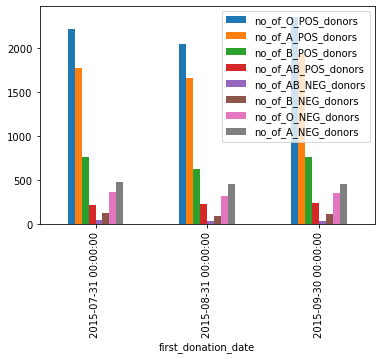

In [20]:
df_merged.plot(x="first_donation_date", y= features, kind="bar")

In [21]:
stats_last_don_O_POS = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_O_POS_donors = ('blood_type', O_POS_don_date)).reset_index()
stats_last_don_A_POS = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_A_POS_donors = ('blood_type', A_POS_don_date)).reset_index()
stats_last_don_B_POS = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_B_POS_donors = ('blood_type', B_POS_don_date)).reset_index()
stats_last_don_AB_POS = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_AB_POS_donors = ('blood_type', AB_POS_don_date)).reset_index()
stats_last_don_AB_NEG = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_AB_NEG_donors = ('blood_type', AB_NEG_don_date)).reset_index()
stats_last_don_B_NEG = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_B_NEG_donors = ('blood_type', B_NEG_don_date)).reset_index()
stats_last_don_O_NEG = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_O_NEG_donors = ('blood_type', O_NEG_don_date)).reset_index()
stats_last_don_A_NEG = df.set_index('max_donation_date').groupby(pd.Grouper(freq= 'Y')).agg(no_of_A_NEG_donors = ('blood_type', A_NEG_don_date)).reset_index()

In [22]:
data_frames_2 = [stats_last_don_O_POS, stats_last_don_A_POS, stats_last_don_B_POS, stats_last_don_AB_POS, stats_last_don_AB_NEG, stats_last_don_B_NEG,stats_last_don_O_NEG, stats_last_don_A_NEG]

In [23]:
df_merged_2 = reduce(lambda  left,right: pd.merge(left,right,on=['max_donation_date'],
                                            how='outer'), data_frames_2).fillna('void')


<AxesSubplot:xlabel='max_donation_date'>

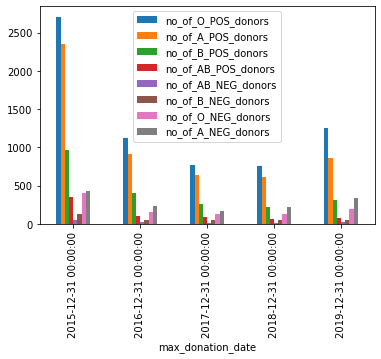

In [24]:
df_merged_2.plot(x="max_donation_date", y= features, kind="bar")

In [25]:


    #2. 2. Compute the survival time (in days) for each donor
    #a.    Survival time = max donations date – first donation date

    df['survival_time'] = df['max_donation_date'] - df['first_donation_date']
    df['survival_time'] = df['survival_time'].astype(str).str.replace("days","")
    df['survival_time'] = df['survival_time'].astype(int)
    print(df.head(10))
    print
    df['survival_status'] = df['survival_time'].apply(lambda x : 1 if x >0 else 0)
    print(df.head(10))
    
    #durations = data['survival_time']
    #event_observed = data['survival_status']

    
    #fig = px.line(df, x = 'donor_key', y = "survival_time", title= "survival_curve")
    #fig.show()

   donor_key first_donation_date max_donation_date donor_sex blood_type  \
0      25412          2015-09-04        2015-09-04         F      O-NEG   
1      39734          2015-08-14        2019-03-01         M      O-POS   
2      39736          2015-08-12        2019-09-25         M     AB-POS   
3      53946          2015-07-28        2016-04-07         M      A-POS   
4      67289          2015-08-17        2016-02-22         F      A-POS   
5      71392          2015-09-19        2018-10-12         F      O-POS   
6     106586          2015-09-30        2017-10-17         M      O-POS   
7     147727          2015-07-18        2015-07-18         M      A-POS   
8     193471          2015-08-19        2017-10-25         F      O-NEG   
9     273550          2015-09-04        2016-06-30         F      O-NEG   

   survival_time  
0              0  
1           1295  
2           1505  
3            254  
4            189  
5           1119  
6            748  
7              0  
8  

In [26]:
data = df.copy()

Text(0.5, 1.0, 'KMF')

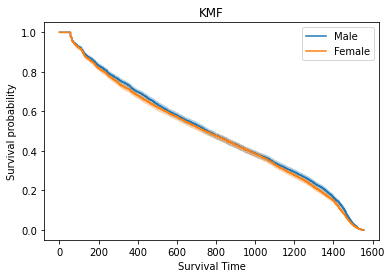

In [27]:
kmf_m = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()
Male = data.query("donor_sex == 'M'")
Female = data.query("donor_sex == 'F'")
kmf_m.fit(durations = Male["survival_time"], event_observed = Male["survival_status"], label = "Male")
kmf_f.fit(durations = Female["survival_time"], event_observed = Female["survival_status"], label = "Female")
kmf_m.plot()
kmf_f.plot()
plt.xlabel("Survival Time")
plt.ylabel("Survival probability")
plt.title("KMF")

In [28]:
kmf_m.event_table
kmf_m.predict(1000)


0.38746279761904734

In [29]:
kmf_m.survival_function_

,Male
timeline,
0.0,1.000000
56.0,0.980283
57.0,0.978423
58.0,0.977493
59.0,0.976004
...,...
1548.0,0.001116
1549.0,0.000744
1550.0,0.000558


In [30]:
d1 = kmf_f.event_table

In [31]:
kmf_m.survival_function_

,Male
timeline,
0.0,1.000000
56.0,0.980283
57.0,0.978423
58.0,0.977493
59.0,0.976004
...,...
1548.0,0.001116
1549.0,0.000744
1550.0,0.000558


In [32]:
kmf_m.predict(1000)

0.38746279761904734

In [33]:
data["blood_type"].value_counts()

O-POS     6608
A-POS     5366
B-POS     2145
O-NEG     1383
A-NEG     1018
AB-POS     680
B-NEG      313
AB-NEG     109
Name: blood_type, dtype: int64

Text(0.5, 1.0, 'KMF')

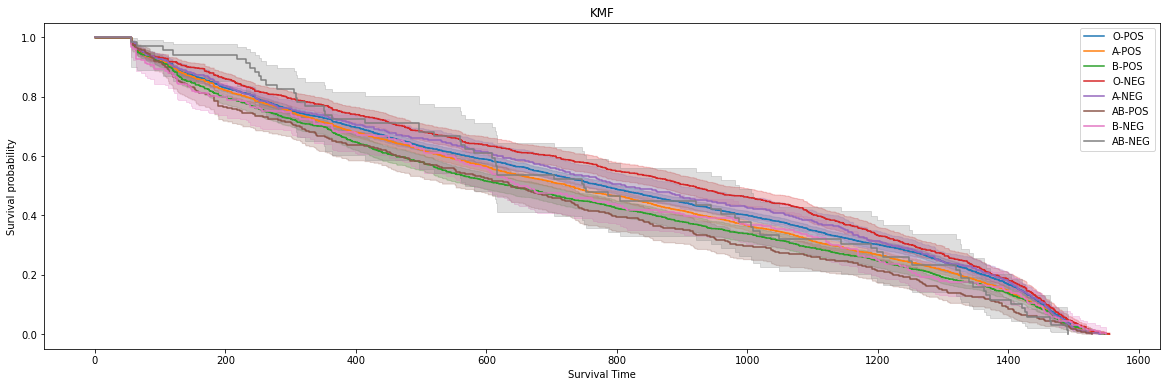

In [34]:
kmf_O_POS = KaplanMeierFitter()
kmf_A_POS = KaplanMeierFitter()
kmf_B_POS = KaplanMeierFitter()
kmf_O_NEG = KaplanMeierFitter()
kmf_A_NEG = KaplanMeierFitter()
kmf_AB_POS = KaplanMeierFitter()
kmf_B_NEG = KaplanMeierFitter()
kmf_AB_NEG = KaplanMeierFitter()


O_POS = data.query("blood_type == 'O-POS'")
A_POS = data.query("blood_type == 'A-POS'")
B_POS = data.query("blood_type == 'B-POS'")
O_NEG = data.query("blood_type == 'O-NEG'")
A_NEG = data.query("blood_type == 'A-NEG'")
AB_POS = data.query("blood_type == 'AB-POS'")
B_NEG = data.query("blood_type == 'B-NEG'")
AB_NEG = data.query("blood_type == 'AB-NEG'")

kmf_O_POS.fit(durations = O_POS["survival_time"], event_observed = O_POS["survival_status"], label = "O-POS")
kmf_A_POS.fit(durations = A_POS["survival_time"], event_observed = A_POS["survival_status"], label = "A-POS")
kmf_B_POS.fit(durations = B_POS["survival_time"], event_observed = B_POS["survival_status"], label = "B-POS")
kmf_O_NEG.fit(durations = O_NEG["survival_time"], event_observed = O_NEG["survival_status"], label = "O-NEG")
kmf_A_NEG.fit(durations = A_NEG["survival_time"], event_observed = A_NEG["survival_status"], label = "A-NEG")
kmf_AB_POS.fit(durations = AB_POS["survival_time"], event_observed = AB_POS["survival_status"], label = "AB-POS")
kmf_B_NEG.fit(durations = B_NEG["survival_time"], event_observed = B_NEG["survival_status"], label = "B-NEG")
kmf_AB_NEG.fit(durations = AB_NEG["survival_time"], event_observed = AB_NEG["survival_status"], label = "AB-NEG")

kmf_O_POS.plot(figsize=(20, 6))
kmf_A_POS.plot()
kmf_B_POS.plot()
kmf_O_NEG.plot()
kmf_A_NEG.plot()
kmf_AB_POS.plot()
kmf_B_NEG.plot()
kmf_AB_NEG.plot()

plt.xlabel("Survival Time")
plt.ylabel("Survival probability")
plt.title("KMF")

In [35]:
kmf_O_POS.predict(1000)


0.40054807033569323

In [36]:
kmf_A_POS.predict(1000)


0.3657964212378997

In [37]:
kmf_B_POS.predict(1000)


0.3382679496669135

In [38]:
kmf_O_NEG.predict(1000)


0.46132075471698125

In [39]:
kmf_A_NEG.predict(1000)


0.425655976676385

In [40]:
kmf_AB_POS.predict(1000)


0.2971576227390181

In [41]:
kmf_B_NEG.predict(1000)


0.367713004484305

In [42]:
kmf_AB_NEG.predict(1000)

0.37681159420289845

In [43]:
kmf_A_POS.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,1957,0,1957,5366,5366
56,67,67,0,0,3409
57,10,10,0,0,3342
58,5,5,0,0,3332
59,2,2,0,0,3327
...,...,...,...,...,...
1542,1,1,0,0,7
1547,3,3,0,0,6
1548,1,1,0,0,3


In [44]:
kmf_AB_POS.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,293,0,293,680,680
56,8,8,0,0,387
57,1,1,0,0,379
58,1,1,0,0,378
63,4,4,0,0,377
...,...,...,...,...,...
1504,1,1,0,0,6
1505,1,1,0,0,5
1512,2,2,0,0,4


In [45]:
kmf_B_NEG.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,90,0,90,313,313
56,7,7,0,0,223
58,1,1,0,0,216
59,1,1,0,0,215
63,7,7,0,0,214
...,...,...,...,...,...
1514,1,1,0,0,5
1520,1,1,0,0,4
1533,1,1,0,0,3


In [46]:
result = data.groupby("survival_time").agg( Female_survive = ("donor_sex", female_don_date),
                                            Male_survive = ("donor_sex", male_don_date)).reset_index() 

In [47]:
result

,survival_time,Female_survive,Male_survive
0,0,3406,2652
1,56,124,106
2,57,13,10
3,58,9,5
4,59,5,8
...,...,...,...
1470,1548,1,3
1471,1549,1,2
1472,1550,1,1
1473,1554,1,2


In [48]:
result = result[result["survival_time"]!= 0]

In [49]:
result

,survival_time,Female_survive,Male_survive
1,56,124,106
2,57,13,10
3,58,9,5
4,59,5,8
5,60,9,11
...,...,...,...
1470,1548,1,3
1471,1549,1,2
1472,1550,1,1
1473,1554,1,2


In [50]:
result["Female_prop"] = result["Female_survive"]/ (result["Female_survive"]+ result["Male_survive"])
result["Male_prop"] = 1- result["Female_prop"]
survival_rate = result
survival_rate

<ipython-input-50-eb2fbd3312a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Female_prop"] = result["Female_survive"]/ (result["Female_survive"]+ result["Male_survive"])
<ipython-input-50-eb2fbd3312a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Male_prop"] = 1- result["Female_prop"]


,survival_time,Female_survive,Male_survive,Female_prop,Male_prop
1,56,124,106,0.539130,0.460870
2,57,13,10,0.565217,0.434783
3,58,9,5,0.642857,0.357143
4,59,5,8,0.384615,0.615385
5,60,9,11,0.450000,0.550000
...,...,...,...,...,...
1470,1548,1,3,0.250000,0.750000
1471,1549,1,2,0.333333,0.666667
1472,1550,1,1,0.500000,0.500000
1473,1554,1,2,0.333333,0.666667


In [51]:
retention_rate = result[result["survival_time"] == 1000]
retention_rate

,survival_time,Female_survive,Male_survive,Female_prop,Male_prop
930,1000,5,4,0.555556,0.444444
